# House Price Prediction with Linear Regression
This project predicts house prices based on their area using **simple linear regression**.


## Create Dataset
First, we create a dataset containing the area and price of 10 houses.

In [2]:
import numpy as np
import pandas as pd

data = {
    'area': [50, 70, 80, 90, 100, 120, 130, 150, 170, 200],
    'price': [320, 400, 480, 520, 590, 650, 750, 820, 900, 1100]
}

df = pd.DataFrame(data)
df

,area,price
0,50,320
1,70,400
2,80,480
3,90,520
4,100,590
5,120,650
6,130,750
7,150,820
8,170,900
9,200,1100


## Prepare Data for Regression

In [3]:
X = df[['area']]
y = df['price']

## Create and Train Linear Regression Model

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


## Display Model Information

In [5]:
print(f"Coefficient (slope): {model.coef_[0]:.2f}")
print(f"Intercept: {model.intercept_:.2f}")
print(f"Equation: price = {model.intercept_:.2f} + {model.coef_[0]:.2f} * area")

Coefficient (slope): 5.10
Intercept: 61.31
Equation: price = 61.31 + 5.10 * area


## Predictions and Model Evaluation

In [6]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)

print(f"MSE: {mse:.2f}, RMSE: {rmse:.2f}, R²: {r2:.4f}")

MSE: 320.64, RMSE: 17.91, R²: 0.9939


## Predict for New Areas

In [ ]:
new_areas = [[60], [110], [180]]
new_predictions = model.predict(new_areas)

for area, price in zip(new_areas, new_predictions):
    print(f"Area {area[0]} m² → Predicted price: {price:.2f}")

## Plot Results

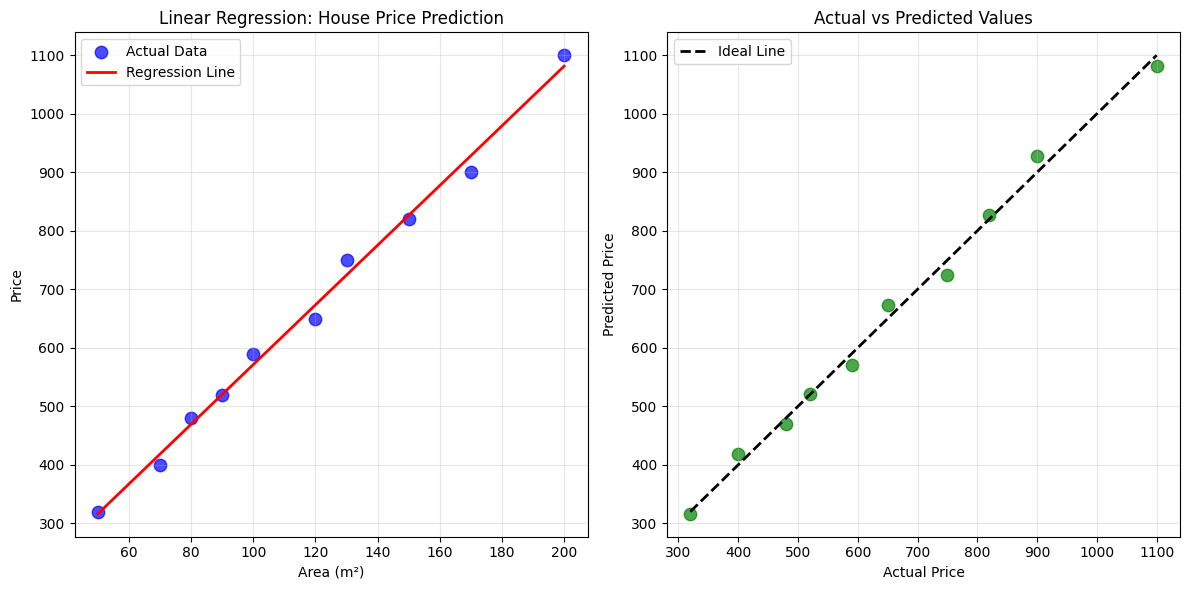

In [8]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(X, y, color='blue', s=80, label='Actual Data', alpha=0.7)
plt.plot(X, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Area (m²)')
plt.ylabel('Price')
plt.title('Linear Regression: House Price Prediction')
plt.legend()
plt.grid(True, alpha=0.3)

# Actual vs Predicted
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred, color='green', s=80, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2, label='Ideal Line')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()


## Comparison Table: Actual vs Predicted

In [9]:
df_comparison = df.copy()
df_comparison['predicted_price'] = y_pred.round(2)
df_comparison['difference'] = (df_comparison['price'] - df_comparison['predicted_price']).round(2)
df_comparison

print("\n" + "="*50)
print("Comparison Table:")
print("="*50)
print(df_comparison)


Comparison Table:
   area  price  predicted_price  difference
0    50    320           316.35        3.65
1    70    400           418.36      -18.36
2    80    480           469.37       10.63
3    90    520           520.38       -0.38
4   100    590           571.39       18.61
5   120    650           673.40      -23.40
6   130    750           724.41       25.59
7   150    820           826.43       -6.43
8   170    900           928.44      -28.44
9   200   1100          1081.47       18.53
